<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe7_Corte_de_Varillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de optimización

La optimización es fundamental para cualquier problema relacionado con la toma de decisiones. La tarea de tomar decisiones implica elegir entre varias alternativas y escoger precisamente la "mejor" decisión posible dependiendo del problema. En este caso, estaremos trabajando con el problema llamado "Corte de Varilla" que busca maximizar una ganacia.

**Entrada**: *Conjunto de variables independientes $[a_1,a_2,...,a_n]$*

**Salida**: *Valor óptimo dependiendo de la función*

Un problema de optimización comienza con un conjunto de variables independientes o parámetros, que pueden incluir restricciones que definen los valores aceptables de estas variables. La solución al problema va a estar dada por un conjunto de valores permitidos para las variables independientes en los que la función objetivo asume un valor óptimo. En términos matemáticos, la optimización implica normalmente maximizar o minimizar la función objetivo.

# 2. Corte de Varillas


## 2.1 Descripción del Algoritmo

El algoritmo "Corte de Varillas", se basa básicamente en maximizar la ganancia en la venta de una varilla, la cual puede estar tanto entera como por partes, y cada parte teniendo un valor específico, como se muestra en la siguiente imagen:


<a href="https://imgur.com/4nKBUhXy"><img src="https://imgur.com/4nKBUhX.png" title="source: imgur.com" /></a>


Aca podemos ver un ejemplo donde tenemos una varilla de largo $4, con los siguientes precios dependiendo del tamaño: 

1. Largo $4$ = 9$

2. Largo $3$ = 8$

3. Largo $2$ = 5$

4. Largo $1$ = 1$

Y lo que busca el algoritmo es, dentro de las 8 opciones posibles, la que nos generará un mayor beneficio (mayor precio), que es este caso es la opción $C$, que nos da un total de 10$.

Este algoritmo puede implementarse de las siguientes maneras:

* *Método Recursivo*

* *Método Programación Dinámica*


##2.2 Método Recursivo

El método recursivo consiste en probar todas las combinaciones posibles ($2^{n-1}$) y luego buscar la solución óptima donde se maximiza la ganancia.

Y esto lo realiza de la siguiente forma: 

* Corta la varilla a un largo $i$ y llama recursivamente a la función con el resto de la varilla de largo $n-i-1$. Con $i$ desde $1$ hasta $N$

* En cada una de las iteraciones va comprobando si el precio de la varilla hasta el largo $i$ más el mejor precio del resto de la varilla es el mayor hasta el momento, y si es el caso, lo guarda en una variable auxiliar.

El principal problema de esto, es que al probar todas las combinaciones posibles se tiende a calcular muchas veces lo mismo, lo que no lo hace muy eficiente a comparación de el método con programación dinámica, cosa que se verá más adelante junto a los arboles de recursión. 

###A continuación se mostrará la implementación del Corte de varillas de forma recursiva:


In [32]:
from termcolor import colored
contadorRecursiva = 0

def corteVarillasRec(precios, n):
  global contadorRecursiva
  contadorRecursiva+=1
  #Caso base
  if (n <= 0):
    return 0 , []

  val_max = -9999999 #Inicializa en valor pequeño para que en la primera comparación se actualice
  cortes = []
  flag = True
  
  for i in range(1,n+1):

    val_aux, corte_Aux = corteVarillasRec(precios , n - i)

    flag = False

    valor = precios[i-1] + val_aux

    if(val_max < valor):
      val_max = valor
      cortes = corte_Aux
      cortes.insert(0,i)

   
  return val_max, cortes

# Ejemplo
precios = [1,5,8,9,12]
print("Arreglo de precios:", precios,"\n")
maximo, cortes = corteVarillasRec(precios, len(precios))

print("El mayor precio a conseguir es", maximo, "con piezas de tamaño", cortes,"y",contadorRecursiva,"llamadas recursivas.")

Arreglo de precios: [1, 5, 8, 9, 12] 

El mayor precio a conseguir es 13 con piezas de tamaño [2, 3] y 32 llamadas recursivas.


## 2.3 Método Programación dinámica

###A continuación se mostrará la implementación del Corte de varillas aplicando la programación dinámica:

In [51]:

def corteVarillasDin(precios, n):

  contadorDinamica = 0
  preciosConocidos = [0 for i in range(n+1)]
  cortes = [[0]]*(n+1)  

  for i in range(1, n + 1):

    val_max = -999999
    
    for j in range(i):

      valor_actual = precios[j] + preciosConocidos[i-j-1]
      
      if(valor_actual > val_max):
        val_max = valor_actual
        cortes_aux = cortes[i-j-1].copy()
        cortes_aux.append(j+1)

    contadorDinamica+=1
    cortes[i] = cortes_aux.copy()
    preciosConocidos[i] = val_max
    
  return preciosConocidos[n], cortes[i], contadorDinamica

# Ejemplo
precios = [1,5,8,9,12]

print("Arreglo de precios:", precios,"\n")

maximo, cortes, contadorDinamica = corteVarillasDin(precios, len(precios))
cortes.pop(0)
print("El mayor precio a conseguir es", maximo, "con piezas de tamaño", cortes,"y",contadorDinamica,"subProblemas a resolver")

Arreglo de precios: [1, 5, 8, 9, 12] 

El mayor precio a conseguir es 13 con piezas de tamaño [3, 2] y 5 subProblemas a resolver


Para resolver problemas usando el **programación dinámica** seguimos la siguiente teoria:

1. Identificamos una **colección relativamente pequeña de subproblemas**.
2. Usamos estos subproblemas para resolver problemas más grandes de manera **correcta**.
3. Resolvemos nuestro problema objetivo, de manera rápida y correcta usando las soluciones de todos los subproblemas.

Por lo que aplicandolo a este algoritmo resolvemos sitemáticamente los problemas desde el más pequeño al más grande (Problema que queremos resolver).

<a href="https://imgur.com/Gs8fEib"><img src="https://imgur.com/Gs8fEib.png" title="source: imgur.com" /></a>

Que en el caso de este ejemplo, para obtener el resultado de $n_4$, debemos simplemente resolver $n_3, n_2 , n_1$ y $n_0$

Para aplicar esto, como vemos a la izquierda de la imagen, esta implementación guarda los SubProblemas ya resueltos, por lo que no debe volver a calcularlos en cada iteración, solo accede directamente a su resultado lo que reduce en gran parte su tiempo de ejecución y lo hace mucho más eficiente a comparación del método recursivo que calcula muchas veces el mismo valor. 

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución método bottom-up).**

  *El algoritmo **Corte de Varillas** tiene un **tiempo de ejecución de** $O(n^2)$* 

## Prueba del teorema

Para probar el teorema debemos analizar que es lo que hace la función, en donde principalmente encontraremos 2 ciclos $for$ como veremos en la siguiente imagen:  

<a href="https://imgur.com/gb7yfx0"><img src="https://imgur.com/gb7yfx0.png" title="source: imgur.com" /></a>

* Primer $for$ puede representarse como $\sum\limits_{j=1}^{n}$

* Segundo $for$ puede representarse como $\sum\limits_{i=1}^{j}$

* Dentro de cada ciclo for se realizan operaciones con tiempos de ejecución constantes, ya sean comparaciones o asiganciones.

Por lo que puede representarse con la siguiente función matemática:

$T(n)=\sum\limits_{i=1}^{n} \sum\limits_{j=1}^{i} c$

Luego desarrollando la ecuación:

$T(n)= c \sum\limits_{i=1}^{n} j$ 

$T(n)= c \sum\limits_{i=1}^{n} j$ 

$T(n)= c \frac{n(n+1)}{2}$ 

$T(n)= c \frac{n^2+n}{2}$ 

Lo cual finalmente nos da un tiempo de ejecución de: $O(n^2)$










# 4. Correctitud 

### **Teorema (Método Programación Dinámica).**

*El algoritmo **Corte de Varillas** retorna el valor más optimo en la venta de una varilla por partes, en donde cada parte tiene un precio específico definido.*

## Prueba del Teorema

Para probar el teorema lo haremos mediante la inducción matemática:

**Caso Base(n = 1):**

*En este caso, ya se encuentra el mayor beneficio posible del subproblema ya que, por muy obvio que sea, este valor mismo valor será el máximo beneficio posible a conseguir.*

**Paso inductivo:**

Tenemos $r(n) = max(p(i)+r(n-i), p(n))$ donde existen 2 casos:

* Cuando $p(n)$ es mayor, retorna el máximo beneficio del precio correspondiente del largo de la varilla completo, por lo que es correcto.

* Cuando es mayor $p(i)+r(n-i)$, el sub problema $r(n-i)$ ya fue resuelto en anteriores iteraciones y retorna el maximo beneficio.

**Correctitud**

Como podemos comprobar, en ambos casos el algoritmo siempre retornará el máximo beneficio en precio, por lo que podemos decir que el algorimo es correcto.


# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación de tiempo de ejecución entre:

* Corte de Varillas Recursivo

* Corte de Varillas con Programación Dinámica

Para el método recursivo, se hace para arreglos entre el rango 20 y 100 con un lista de precios aleatorios ordenados de menor a mayor. Mientras que para el método Programación Dinámica, el rango del arreglo es entre 10 al 23 con la lista de precios aleatorios ordenados crecientemente.


In [ ]:
import random
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

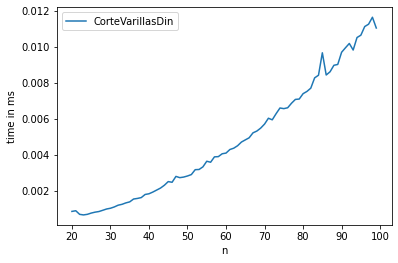

In [21]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[];
verbose = False
for n in range(20,100):
  import random

  arr = cutrod_instance_generator(n)

  t1 = repeat(setup="from __main__ import corteVarillasDin", stmt=f"corteVarillasDin({arr}, {len(arr)})", repeat=1, number=10)

  x.append(n)
  y.append(t1)

plt.plot(x,y)
plt.legend(["CorteVarillasDin"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

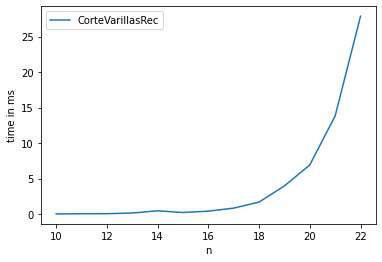

In [31]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[];
verbose = False
for n in range(10,23):
  a = cutrod_instance_generator(n)

  t = repeat(setup="from __main__ import corteVarillasRec", stmt=f"corteVarillasRec({a}, {len(a)})", repeat=1, number=10)
  
  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["CorteVarillasRec"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

A continuacion se mostrará el resultado de ambos gráficos:

<a href="https://imgur.com/b2MvimO"><img src="https://imgur.com/b2MvimO.png" title="source: imgur.com" /></a>

<a href="https://imgur.com/jKssZyC"><img src="https://imgur.com/jKssZyC.png" title="source: imgur.com" /></a>

Aplicando el método bottom-up, vemos que tarda un tiempo exponencialmente menor que de la manera recursiva, llegando a resolver problemas de tamaño $100$ en cuestion de $0.012ms$. Mientras que para el método recursivo, para un problema de tan solo tamaño $22$ el algoritmo ya aumenta su tiempo de ejecución a más de $25ms$, por lo que podemos ver la gran diferencia que existe entre ambos métodos. Con esto podemos comprobar el número de problemas a resolver de ambos, ya que por un lado, con el método bottom-up, el algoritmo debe resolver $n-1$ SubProblemas, mientras que en el recursivo este número asciende a $n^2$.


## 5.2. Número de SubProblemas a resolver

A continuación se muestra gráficamente la comparación de número de subProblemas a resolver para el método bottom-up (programación dinámica) vs el valor teórico de subProblemas a resolver.


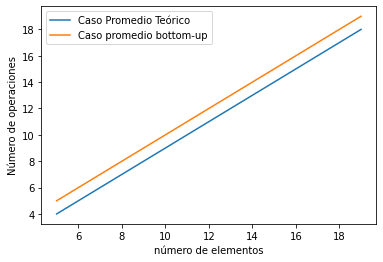

In [49]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)]
y1=[n-1 for n in range(5,20)]
y=[]

for n in range(5,20):
  a = cutrod_instance_generator(n)
  max,cortes,cont = corteVarillasDin(a,len(a))
  y.append(cont)

plt.plot(x,y1)
plt.plot(x,y)
plt.legend(["Caso Promedio Teórico","Caso promedio bottom-up"])

plt.xlabel('número de elementos')
plt.ylabel('Número de operaciones')
plt.show()


### Análisis de resultados

Como podemos apreciar del gráfico, el caso teórico de subproblemas a resolver es de $n-1$ subProblemas, puesto que sin considerar el 0, el algoritmo aplicando bottom-up basta con resolver todos los subProblemas anteriores. Y al ver el gráfico, vemos que se ambas rectas se comportan de manera muy similar, de forma lineal y en valores cercanos. 